In [ ]:
import torch
from torch import nn
# from d2l import torch as d2l
import matplotlib.pyplot as plt

In [ ]:
#We will use a linear regression formula to make a straight line with known parameters.

In [ ]:
# creating known parameters
weight = 0.7
bias = 0.3

#creat
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1) #input
y = X * weight + bias #output

In [ ]:
y[:10], X[:10], len(y),len(X)

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 50,
 50)

In [ ]:
train_split = int(0.8 * len(X))
train_split

40

In [ ]:
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train[:10], y_train[:10], X_test, y_test

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
def plot_prediction(train_data = X_train,
                    train_lebels = y_train,
                    test_data = X_test,
                    test_lebels = y_test,
                    predictions = None):
  plt.figure(figsize=(10, 7))

  #shows train data in red
  plt.scatter(train_data, train_lebels, c="r", s=4, label="Training data")

  #shows test data in blue
  plt.scatter(test_data, test_lebels, c = "b", s = 4, label = "Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c = "g", s = 4, label = "Prediction")
  plt.legend(prop = {"size":15})
  plt.show()

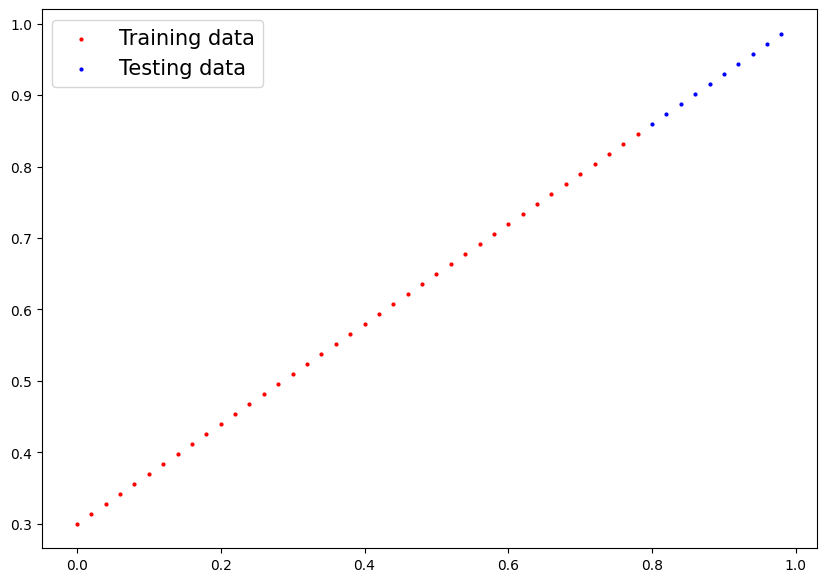

In [ ]:
plot_prediction()

In [ ]:
#Build model

In [ ]:
import torch.nn as nn

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

**x: torch.Tensor** :
This is type hinting, which suggests that the input x should be of type torch.Tensor.
torch.Tensor is PyTorch’s primary data structure for representing multi-dimensional arrays (like NumPy arrays).

**-> torch.Tensor** :
This indicates the expected return type. The function is expected to return a torch.Tensor.

In [ ]:
# Now we've created a model, let's see what's inside...
# So we can check our model parameters or what's inside our model using `.parameters( )` .

In [ ]:
model = LinearRegressionModel()
input_data = torch.tensor([1.0, 2.0, 3.0])
output = model(input_data)
print(model.state_dict())
print(output)

OrderedDict([('weights', tensor([-1.5907])), ('bias', tensor([1.1610]))])
tensor([-0.4297, -2.0204, -3.6111], grad_fn=<AddBackward0>)


In [ ]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


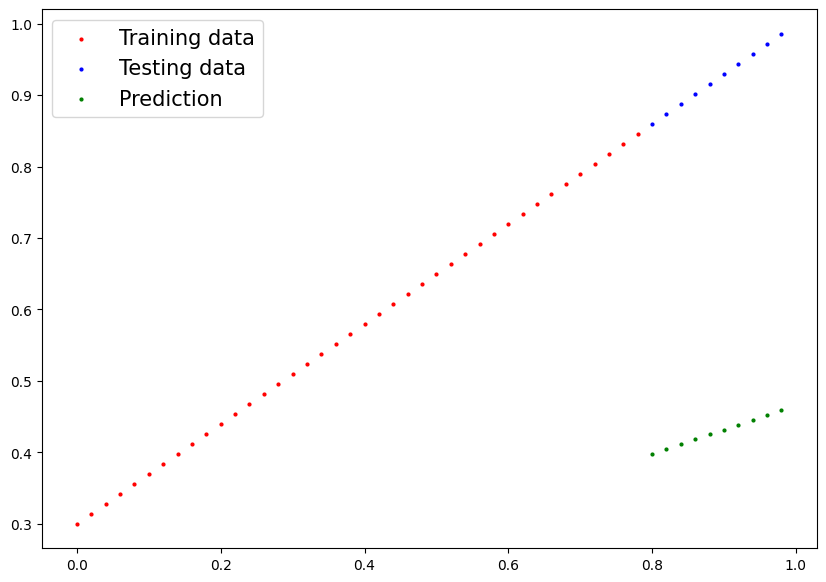

In [ ]:
plot_prediction(predictions=y_preds)

In [ ]:
# set up loss function
loss_fn = nn.L1Loss()
# set up optimizer
optimerzer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [ ]:
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  # set the model to train
  model_0.train()

  # 1. forward pass
  y_preds = model_0(X_train)

  # 2. calculate loss
  loss = loss_fn(y_preds, y_train)
  # print(f"Loss: {loss}")

  # 3. optimizer zero grad
  optimerzer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimerzer.step()

  ### Test model
  # turn off different settings not needed for evaluatuon/testing of model
  model_0.eval()
  with torch.inference_mode():
    test_preds = model_0(X_test)
    test_loss = loss_fn(test_preds, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch : {epoch} |Loss: {loss} |Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch : 0 |Loss: 0.31288138031959534 |Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 10 |Loss: 0.1976713240146637 |Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch : 20 |Loss: 0.08908725529909134 |Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch : 30 |Loss: 0.053148526698350906 |Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch : 40 |Loss: 0.04543796554207802 |Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch : 50 |Loss: 0.04167863354086876 |Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch : 60 |Loss: 0.03818932920694351 |Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [ ]:
# now we will plot a curve as we are tracking loss value, epoch value, test-loss value

In [ ]:
import numpy as np

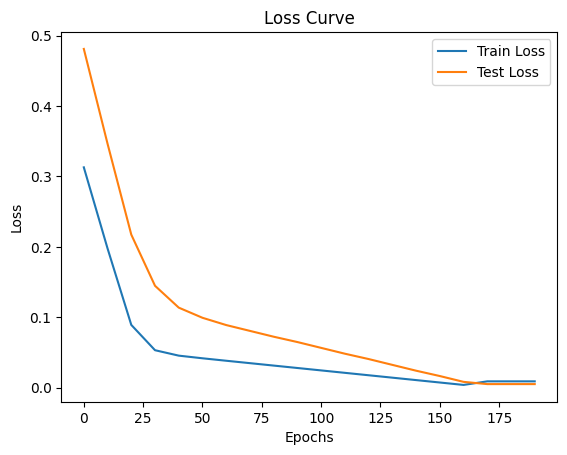

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()),label = "Train Loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).cpu().numpy()), label = "Test Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [ ]:
weight,bias

(0.7, 0.3)

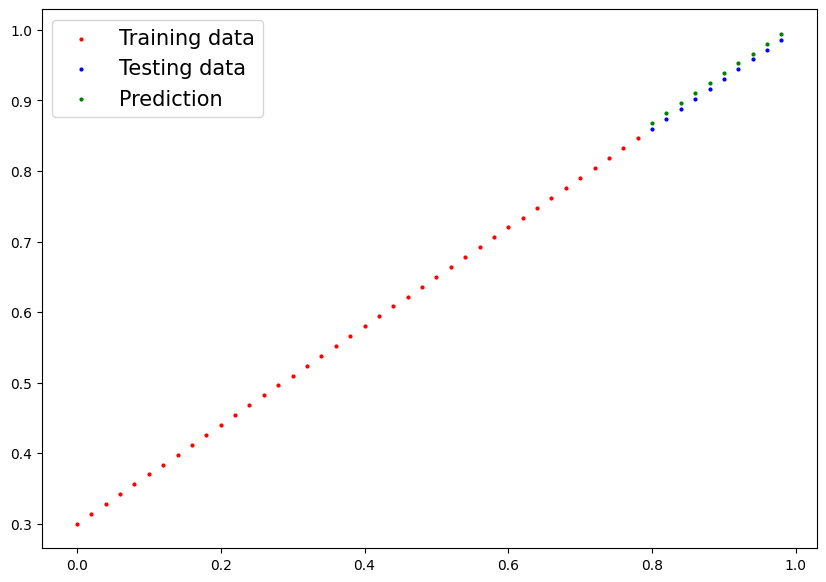

In [ ]:
plot_prediction(predictions=y_preds_new)

In [ ]:
### create some new data using y = weight * X + bias

In [ ]:
weight = 0.7
bias = 0.3

#create range values
start = 0
end = 1
step = 0.02

#create X and y
X = torch.arange(start,end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

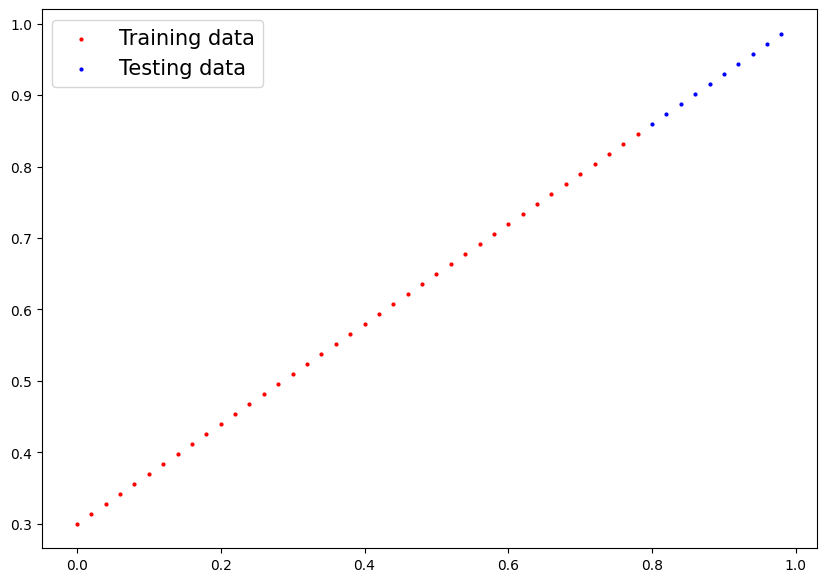

In [ ]:
# plot prediction
plot_prediction(X_train, y_train, X_test,y_test)

### Building pytorch Linear Model

In [ ]:
#create Linear model by subclassing nn.Module
class linearRegressionModelV2(nn.Module):
  def __init__(self):
     super().__init__()

     #using nn.Linear() to create parameters
     self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
torch.manual_seed(42)
model_1 = linearRegressionModelV2()
model_1,model_1.state_dict()

(linearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device = "cuda")
next(model_1.parameters()).device

device(type='cuda', index=0)

### Trainig model
* loss function
* optimizer
* training loop
* testing loop

In [ ]:
#set up loss function
loss_fn = nn.L1Loss()

#set up optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)

In [ ]:
#training loop
torch.manual_seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epochs = 200
for epoch in range(epochs):

  #forward pass
  y_preds = model_1(X_train)

  #calculate loss
  loss = loss_fn(y_preds, y_train)

  #optimizer gradiant zero
  optimizer.zero_grad()

  #backpropagation
  loss.backward()

  #optimizer step
  optimizer.step()

  #testing loop
  model_1.eval()
  with torch.inference_mode():

    test_preds = model_1(X_test)

    test_loss = loss_fn(test_preds, y_test)


  if epoch % 50 == 0:
    print(f"Epoch : {epoch} | Loss : {loss} | Test_Loss: {test_loss}")

Epoch : 0 | Loss : 0.5551779866218567 | Test_Loss: 0.5739762187004089
Epoch : 50 | Loss : 0.023886388167738914 | Test_Loss: 0.04784907028079033
Epoch : 100 | Loss : 0.006215683650225401 | Test_Loss: 0.014086711220443249
Epoch : 150 | Loss : 0.0012645035749301314 | Test_Loss: 0.013801801018416882


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
with torch.inference_mode():
  y_preds_new = model_1(X_test)

In [ ]:
def plot_prediction(train_data = X_train,
                    train_lebels = y_train,
                    test_data = X_test,
                    test_lebels = y_test,
                    predictions = None):
  plt.figure(figsize=(10, 7))

  #shows train data in red
  plt.scatter(train_data.cpu(), train_lebels.cpu(), c="r", s=4, label="Training data") # Move data to CPU

  #shows test data in blue
  plt.scatter(test_data.cpu(), test_lebels.cpu(), c = "b", s = 4, label = "Testing data") # Move data to CPU

  if predictions is not None:
    plt.scatter(test_data.cpu(), predictions.cpu(), c = "black", s = 4, label = "Prediction") # Move data to CPU
  plt.legend(prop = {"size":15})
  plt.show()

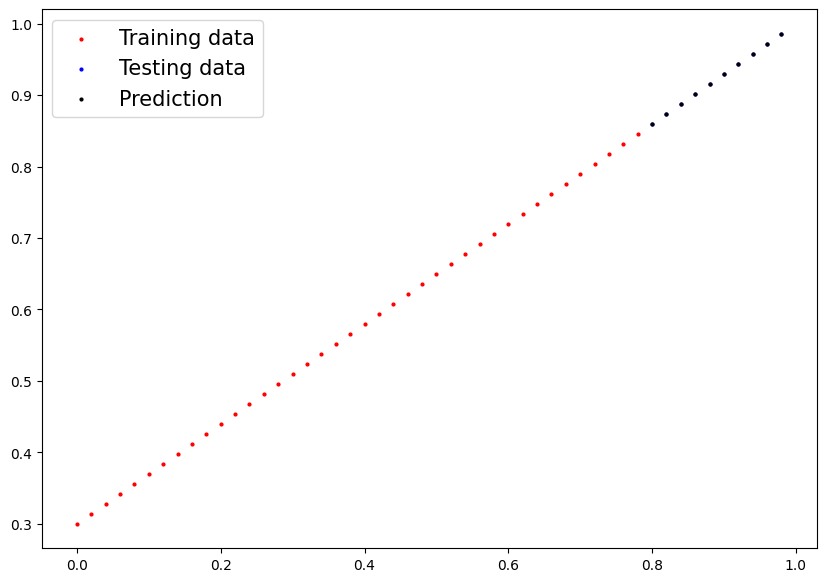

In [ ]:
plot_prediction(predictions=y_preds_new)